# STEP 1 ---> Importing necessary libraries for analysis.. 

In [1]:
import matplotlib.pyplot as plt  # data visualizations 
import pandas as pd # for data manipupation and analysis 
import seaborn as sns # data visualizations(better than plt)
import numpy as np # for mathematical Operations  

# step 2 ----> Create The DataFrame

In [2]:
df  = pd.read_csv("Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# STEP 3 

# Cleaning df["rate"] column removing "/" from 4.1/5 ---> 4.1 and changing their datatype to "float"

In [3]:
def handlerate(value):
    value = str(value).split("/")
    value = value[0]
    return float(value)
df["rate"] = df["rate"].apply(handlerate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


# checking for Null values

In [4]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

 # Q 1) majority of people order from which restaurants? 

<Axes: xlabel='listed_in(type)'>

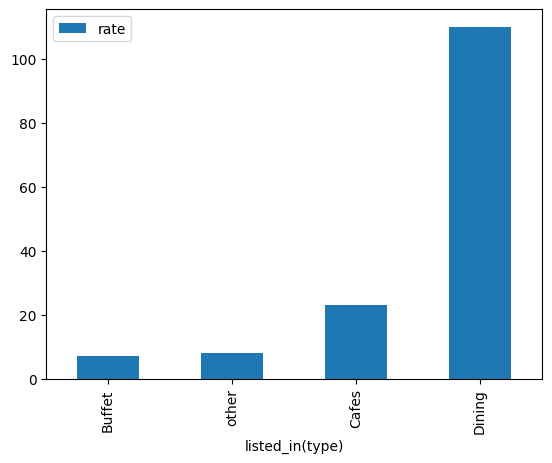

In [5]:
df.groupby("listed_in(type)").agg({"rate":"count"}).sort_values(by = "rate", ascending =True).plot(kind = "bar")

C:\Users\Akshay\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akshay\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akshay\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='listed_in(type)', ylabel='count'>

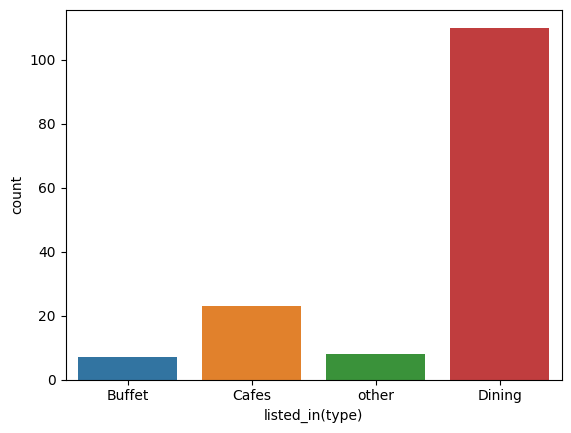

In [6]:
#2nd of solving using sns library
sns.countplot(data = df, x="listed_in(type)")

# Q. 2) how many votes have received to each restaurant from customers?


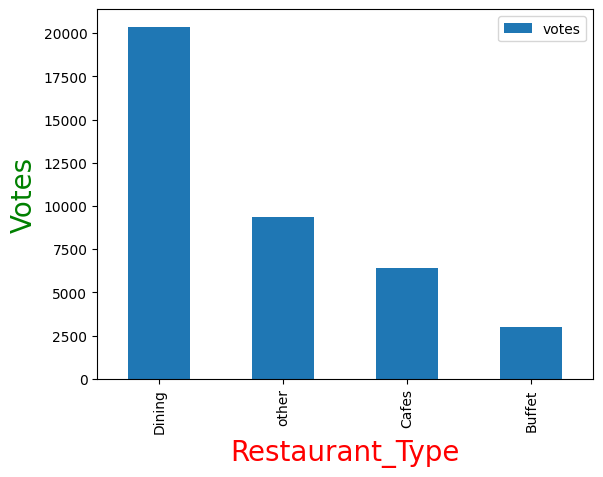

In [7]:
df.groupby("listed_in(type)").agg({"votes" : "sum"}).sort_values(by = "votes", ascending = False).plot(kind = "bar")
plt.xlabel("Restaurant_Type",c="red",size =20 )
plt.ylabel("Votes",c="Green",size =20)
plt.show()

# conclusion:- dining restaurants have received maximum numbers of votes

# Q. 3)what are the ratings that the majority of restaurants have received?

Text(0.5, 1.0, 'Rating Distribution')

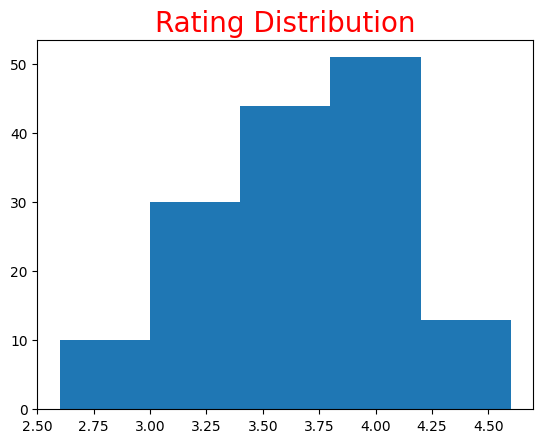

In [8]:
# df.groupby(["listed_in(type)", "rate"]).agg({"rate":"count"}).plot(kind = "hist")
# df.groupby(["listed_in(type)"]).agg({"rate":"mean"})
plt.hist(df["rate"], bins = 5)
plt.title("Rating Distribution", c = "Red" , size =20)

# conclusion --> Majority of the rating lies between 3.5 and 4.1

# Q 4) most couples order their food online, what is their avg. spending on each order? 


C:\Users\Akshay\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akshay\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akshay\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

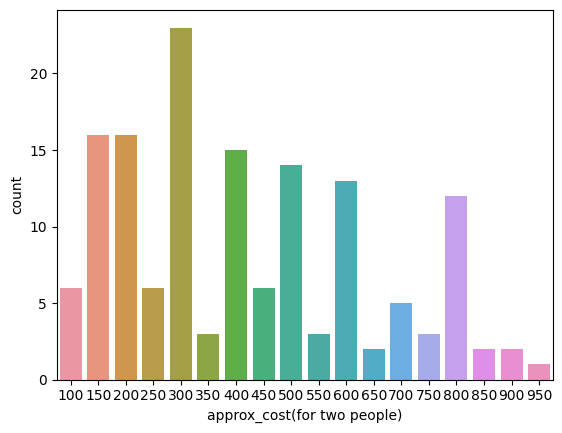

In [9]:
# df.groupby("approx_cost(for two people)").agg({"rate": "count"}).plot(kind = "bar")
                                            # OR
sns.countplot(data = df , x =df["approx_cost(for two people)"])

# conclusion --->  the majority of couples prefer restaurants with approx. cost of 300rs

#  Q) 5. which mode has received maximum number of ratings

<Axes: xlabel='online_order'>

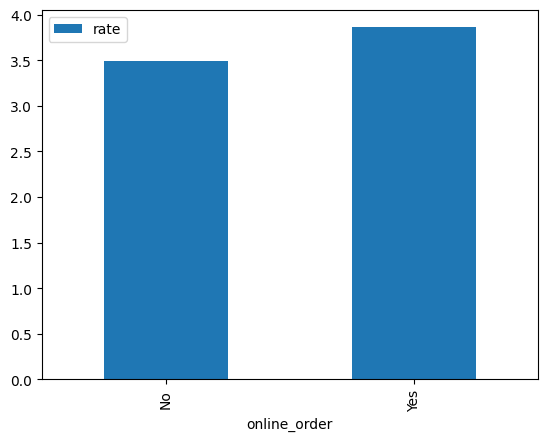

In [10]:
df.groupby("online_order").agg({"rate":'mean'}).plot(kind= "bar")

# conclusion --> online orders have received higher ratings as compared to offline.

# Q 5) which restaurant are getting more offline orders. 

In [11]:
data1 = df[df["online_order"] == "No"]
x = data1.groupby("listed_in(type)").agg({"votes": "count" }).reset_index().sort_values(by = "votes", ascending = True)
x

,listed_in(type),votes
3,other,2
0,Buffet,3
1,Cafes,8
2,Dining,77


C:\Users\Akshay\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akshay\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akshay\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='listed_in(type)', ylabel='votes'>

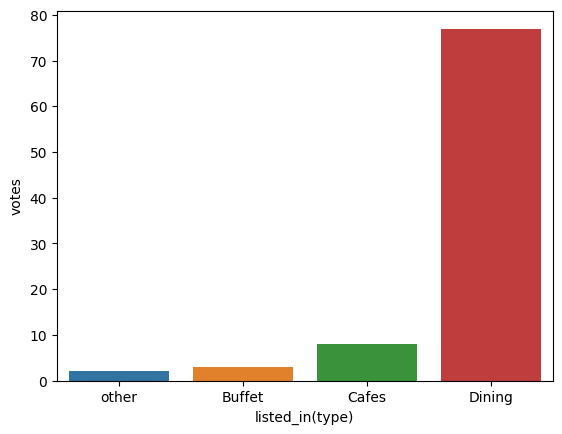

In [12]:
sns.barplot(data = x , x = "listed_in(type)" , y  = "votes")

# conclusion --->  dining restaurants are getting more offline orders as compared to others.